

 Model 2D Dataset



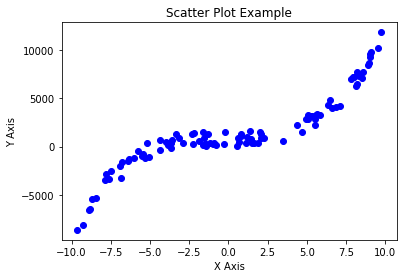



Epoch 0 : 2.8045093168662314 0.15006631239563697 0.040479034340047314 0.0030023401200892003
Epoch 1 : 4.905935374329749 0.2803623842843468 0.0706828002618112 0.005756528222849299
Epoch 2 : 6.480417434500056 0.395779237410925 0.09318576969022646 0.008323648642107887
Epoch 3 : 7.65996806232127 0.49998280146312246 0.10991745268097951 0.010749486523089886
Epoch 4 : 8.543527816733905 0.5957208253596222 0.12232397430880632 0.013068360586717542
Optimal Solution = Epoch 9999 : 10.655168698725843 20.970276527941813 -1.8103041714197274 7.9893336076278585 



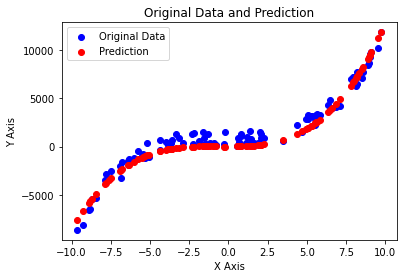





 3D Dataset using two variables (X1 and X2)



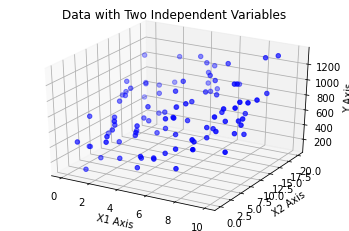



Epoch 0 : 7.43847600018326 15.595631430047339 1.4265844915879997 
Epoch 1 : 12.954483113402425 26.731746959534096 2.481143659135288 
Epoch 2 : 17.084193849045587 34.664109745712814 3.2680146970514867 
Epoch 3 : 20.213137348549306 40.2953527521597 3.862205034306656 
Epoch 4 : 22.618552798604984 44.274269323103674 4.317638791453634 
Optimal Solution = Epoch 9999 : 32.73494342264618 34.69592128962032 222.91661391579635 



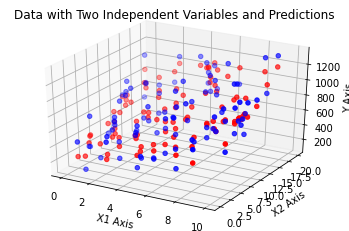

In [54]:
# PID 5280909
# Name Colton Curtis
# Collaboration: 


# Import Libraries
import numpy as np #step 1
import pandas as pd #step 2
import matplotlib.pyplot as plt #step 3
from mpl_toolkits.mplot3d import Axes3D


#Import the data
data = pd.read_csv("data_nonlinear.csv")
x = data['X']
y = data['Y']

plt.scatter(x, y, color="blue") # Create scatter plot

# Add labels and title to the plot
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scatter Plot Example")

print("\n\n Model 2D Dataset\n")
# Show the plot
plt.show()
print("\n")

# Initalize Values
a, b, c, d = 0, 0, 0, 0 

# Cubic Function (for weights)
def cubicF(x, a, b, c, d): 
  return a*x**3 + b*x**2 + c*x + d

# MSE Loss Function
def mseL(y, Ypred):
  return np.mean((y - Ypred)**2)

L = 1e-6  # The learning Rate
epochs = 1e4  # The number of iterations to perform gradient descent


n = len(x) # Number of elements in X

# Performing Gradient Descent 
for i in range(int(epochs)):
    Ypred = cubicF(x, a, b, c, d)  # The current predicted value of Y
    loss = mseL(y, Ypred)

    Da = -2/n * sum(x**3 * (y-Ypred))  # Derivative wrt a
    Db = -2/n * sum(x**2 * (y-Ypred))  # Derivative wrt b
    Dc = -2/n * sum(x * (y-Ypred))     # Derivative wrt c
    Dd = -2/n * sum(y-Ypred)           # Derivative wrt d
    a -= (L * Da)  # Update a
    b -= (L * Db)  # Update b
    c -= (L * Dc)  # Update c
    d -= (L * Dd)  # Update d

    if i < 5: # Print the first 5
      print(f"Epoch {i} : {a} {b} {c} {d}")

    #print(i, loss)

# Final Solution -> Converged
print(f"Optimal Solution = Epoch {i} : {a} {b} {c} {d} \n")

# Making predictions
prediction = cubicF(x, a, b, c, d)

# Scatter Plot of Original Data (x, y) and Prediction (x, Y prediction)
plt.scatter(x, y, color="blue", label="Original Data")
plt.scatter(x, prediction, color="red", label="Prediction")

# Add labels, title, and legend to the plot
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Original Data and Prediction")
plt.legend()

# Show the plot
plt.show()


# __________________________ 3D Dataset ____________________________

# Scan in the file
dataset = pd.read_csv("data_two_variables.csv")
x1 = dataset['X1']
x2 = dataset['X2']
y = dataset['Y']

# Creates a 3D model of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color="blue", label="Original Data")

# Labels
ax.set_xlabel("X1 Axis")
ax.set_ylabel("X2 Axis")
ax.set_zlabel("Y Axis")
ax.set_title("Data with Two Independent Variables")


print("\n\n\n\n 3D Dataset using two variables (X1 and X2)\n")
# Print
plt.show()
print("\n")

m1, m2, m3 = 0, 0, 0

# Linear Function (for weights)
def linearF(x1, x2, m1, m2, m3):
  return m1*x1 + m2*x2 + m3

# MSE Loss Function
def mseLoss(y, predict):
  return np.mean((y - predict)**2)

n = len(y)
LR = 1e-3  # The learning Rate
EP = 1e4  # The number of iterations to perform gradient descent

# Performing Gradient Descent 
for i in range(int(EP)):
    predict = linearF(x1, x2, m1, m2, m3)  # The current predicted value of Y
    loss = mseL(y, predict)

    derA = -2/n * sum(x1 * (y - predict))  # Derivative wrt a
    derB = -2/n * sum(x2 * (y - predict))  # Derivative wrt b
    derC = -2/n * sum(y - predict)         # Derivative wrt c 
    m1 -= (LR * derA)  # Update m1
    m2 -= (LR * derB)  # Update m2
    m3 -= (LR * derC)  # Update m3

    if i < 5: # Print the first 5
      print(f"Epoch {i} : {m1} {m2} {m3} ")

    #print(i, loss)

# Final Solution -> Converged
print(f"Optimal Solution = Epoch {i} : {m1} {m2} {m3} \n")

# Making predictions
prediction = linearF(x1, x2, m1, m2, m3)

# Creates a 3D model of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color="blue", label="Original Data")
ax.scatter(x1, x2, prediction, color="red", label="Predictions")

# Labels
ax.set_xlabel("X1 Axis")
ax.set_ylabel("X2 Axis")
ax.set_zlabel("Y Axis")
ax.set_title("Data with Two Independent Variables and Predictions")

# Print
plt.show()